In [31]:
#importing packages
import numpy as np   #importing numpy for array handling
import pandas as pd  #importing pandas for data preprocessing
import matplotlib.pyplot as plt  #importing matplotlib for data visualization
import seaborn as sns  #importing seaborn for data visualization
from sklearn.model_selection import train_test_split  #importing train_test_split to get train and test data set from complete data
from sklearn.preprocessing import StandardScaler  #importing StandardScaler for normalizing features which may be in different units
from sklearn import datasets  #importing datasets for data processing

In [32]:
#loading boston dataset
boston = datasets.load_boston()

#renaming the columns with feature names
features = pd.DataFrame(boston.data, columns=boston.feature_names)

#getting the target column(output column in targets)
targets = boston.target

In [33]:
#loading the data into bos dataframe
bos = pd.DataFrame(boston.data)

#renaming the columns with it's feature names
bos.columns = boston.feature_names

#adding the price column to the bos
bos['PRICE'] = boston.target

#printing the top 5 records
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [34]:
#differentiating independent features and storing them in X 
X = bos.iloc[:, :-1].values

#differentiating dependent(output) features from dataframe and storing them in Y
y = bos.iloc[:, -1].values

In [35]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [36]:
#creating instance of StandardScaler for performing mean normalization
sc = StandardScaler()

#normalizing train input dataset
X_train = sc.fit_transform(X_train)

#normalizing test input dataset
X_test = sc.transform(X_test)

In [37]:
#importing package for fitting data into RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

In [38]:
#creating instance of RandomForestRegressor model
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

#fitting training dataset into the model
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
#predicting the testset output from the model and storing them in y_pred
y_pred = regressor.predict(X_test)

In [40]:
#importing package to find accuracy of the model
from sklearn.metrics import r2_score

#calculating the accuracy of model using r2_score 
score=r2_score(y_test,y_pred)

#printing the accuracy score of the model
print(score*100)

90.81940932283322


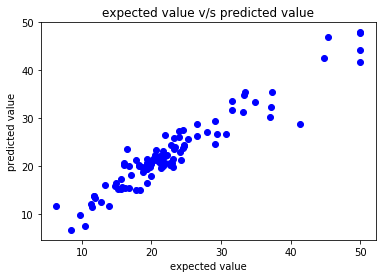

In [41]:
#plotting the expected value v/s predicted value
plt.scatter(y_test,y_pred,color='blue')

#setting the title to the plot
plt.title('expected value v/s predicted value')

#setting X_label to the plot
plt.xlabel('expected value')

#setting Y_label to the plot
plt.ylabel('predicted value')

#showing the plot
plt.show()